In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #plotting
import warnings
warnings.filterwarnings("ignore") #ignoring the seaborn warning
import matplotlib.pyplot as plt
#import matplotlib_inline 
from sklearn.model_selection import train_test_split
from sklearn import *
from sklearn.preprocessing import RobustScaler

In [37]:

df = pd.read_csv("/Users/vivek/Desktop/school/BIGDATA/heart.csv") #loading the datasets

In [38]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
df.head(10) #loading the first 10 rows to analyse the datasets

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Changing the name of columns and giving them a meaningful name so anyone can understand better

In [41]:
new_cols = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [42]:
df.columns = new_cols

In [43]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.shape #303 rows and 14 cols

(303, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df.isnull().sum() #We have 16 missing values in age column


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
#filling the missing value with tha age average value
df['age'].mean()
df['age'].fillna(int(df['age'].mean()), inplace= True)

Now we know that😁
Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”

#####
Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

In [50]:
num_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
cat_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]


In [51]:
df[num_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Let's plot some graph for better visuals and understanding

<Axes: xlabel='age', ylabel='Density'>

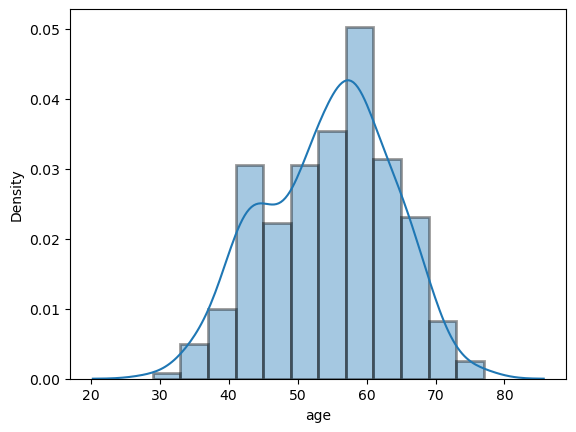

In [53]:
sns.distplot(df["age"], hist_kws = dict(linewidth = 2, edgecolor = "k"))

<Axes: xlabel='trtbps', ylabel='Density'>

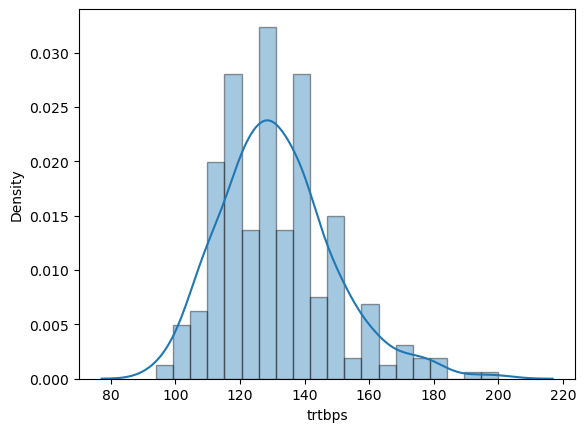

In [55]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

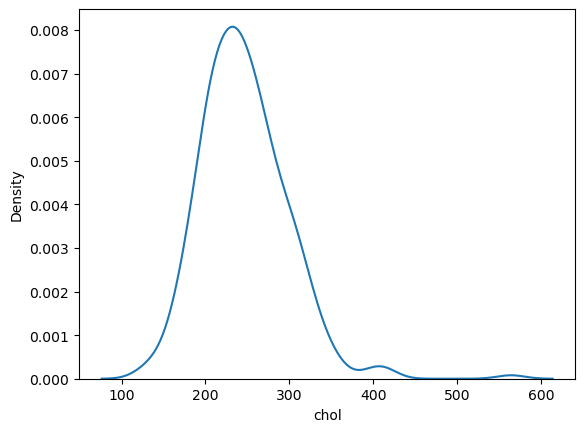

In [57]:
sns.distplot(df["chol"], hist = False);

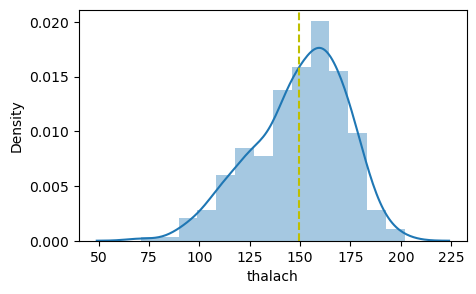

In [59]:
x, y = plt.subplots(figsize = (5, 3))
sns.distplot(df["thalach"], hist = True, ax = y)
y.axvline(df["thalach"].mean(), color = "y", ls = "--")

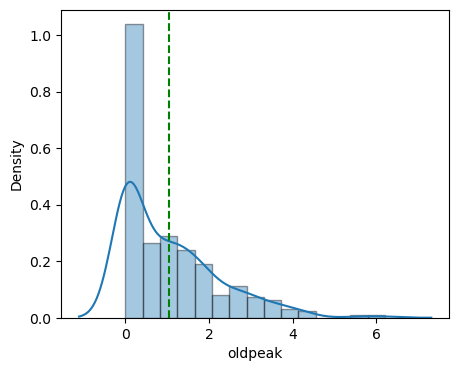

In [61]:
x, y = plt.subplots(figsize = (5, 4))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 15, ax = y)
y.axvline(df["oldpeak"].mean(), color = "g", ls = "--")

### Result from above graph
- The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10
- When we look at the mean, we see that it is 1.03
- When we examine the quartiles, 75% of the data consists of values up to 1.60
- This shows that; There is an incredible right skew in the data.

In [63]:
#Commenting out because it will not run everytime
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

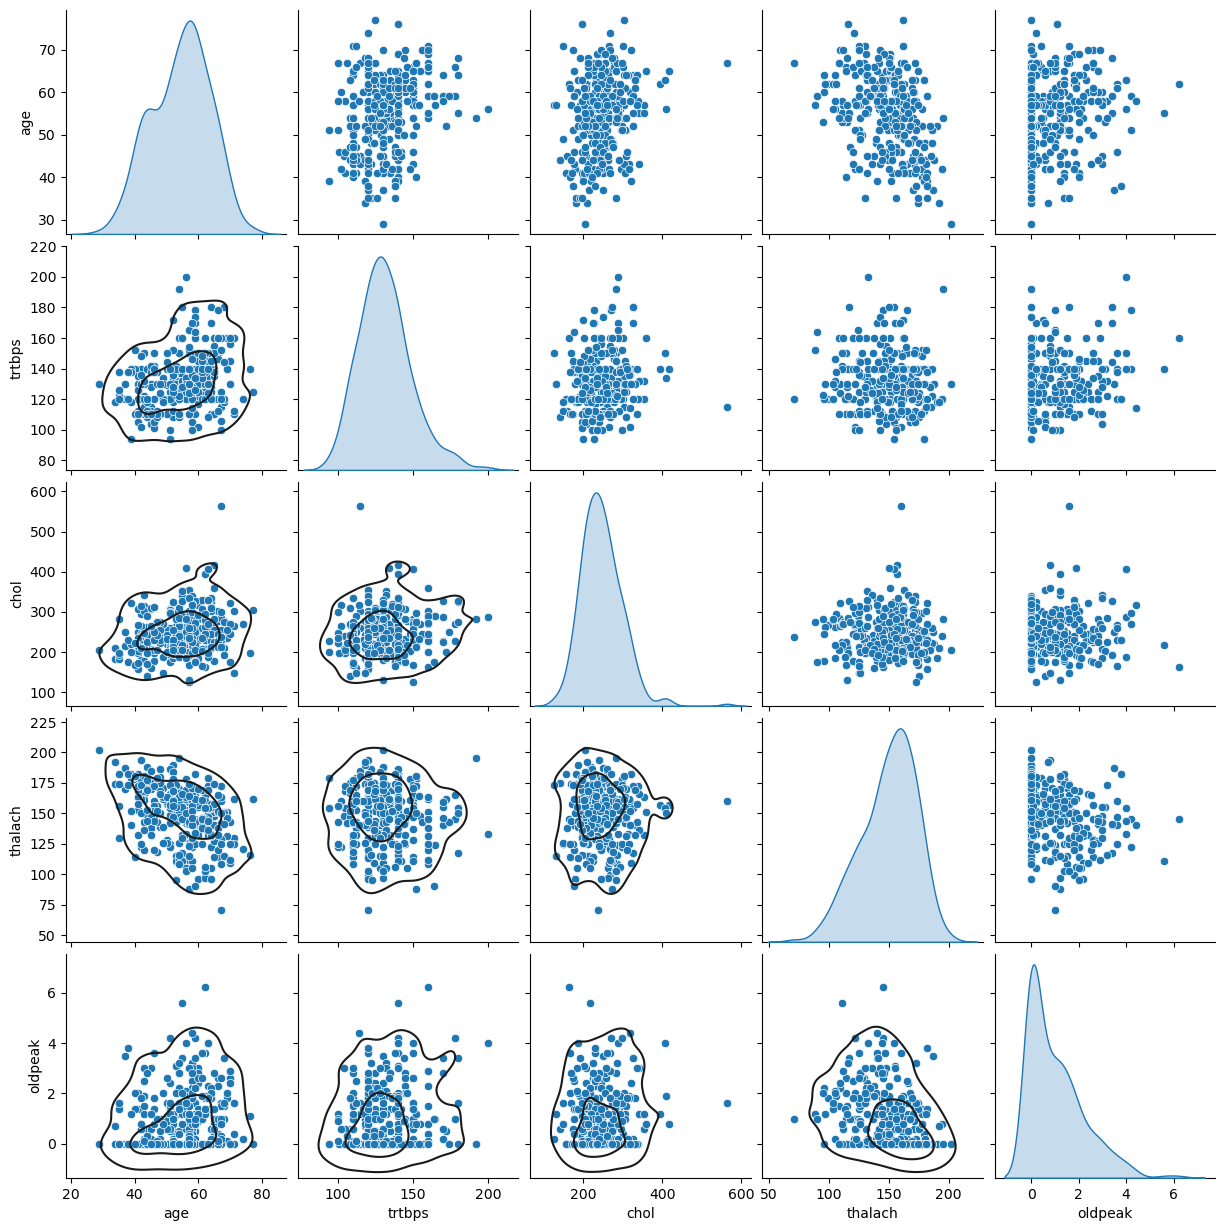

In [64]:
graph = sns.pairplot(df[num_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 3, color = ".1")
plt.show()

## Removing the cols which has low corelation

In [66]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)

### Checking the outliers using box plot

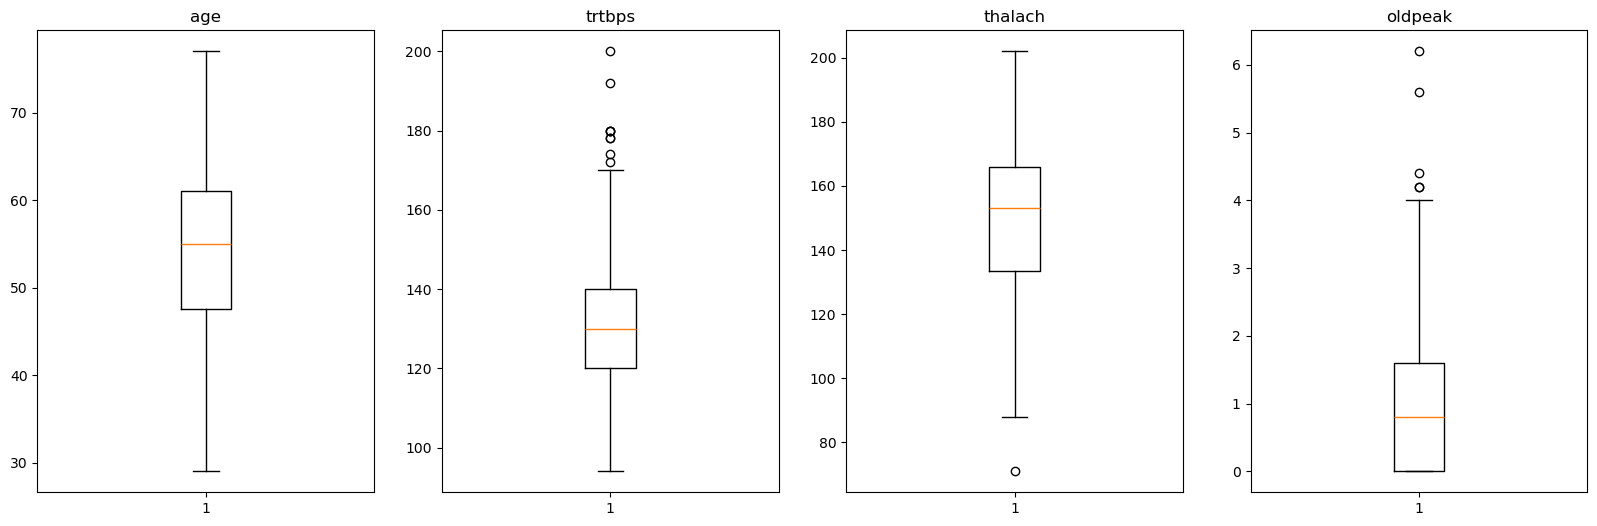

In [69]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")
 
ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

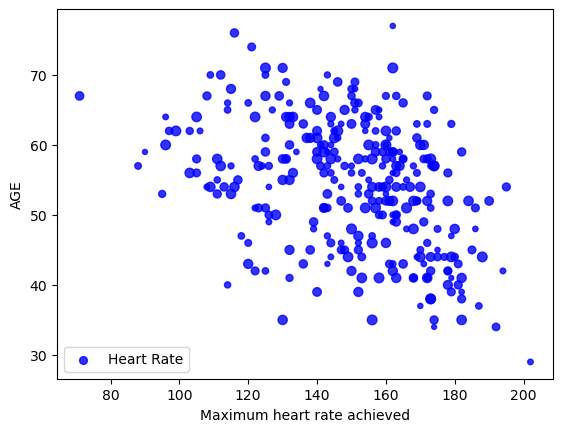

In [70]:
x = df['thalach']
y = df['age']
s = np.random.rand(*x.shape) * 150 + 50

plt.scatter(x, y, s, c="b", alpha=0.8, marker=r'.',
            label="Heart Rate")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("AGE")
plt.legend(loc='lower left')
plt.show()

### Applying One Hot Encoding Method to Categorical Variables

In [72]:
df_copy = df.copy()

In [73]:
df_copy.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


In [74]:
cat_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [75]:
cat_var.remove("fbs")
cat_var.remove("rest_ecg")

In [76]:
cat_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [77]:
df_copy = pd.get_dummies(df_copy, columns = cat_var[:-1], drop_first = True)

In [78]:
df_copy.head()

,age,trtbps,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,150,2.3,1,True,False,False,True,False,False,False,False,False,False,False,True,False,False
1,37,130,187,3.5,1,True,False,True,False,False,False,False,False,False,False,False,False,True,False
2,41,130,172,1.4,1,False,True,False,False,False,False,True,False,False,False,False,False,True,False
3,56,120,178,0.8,1,True,True,False,False,False,False,True,False,False,False,False,False,True,False
4,57,120,163,0.6,1,False,False,False,False,True,False,True,False,False,False,False,False,True,False


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/vivek/Desktop/school/BIGDATA/heart.csv'
data = pd.read_csv(file_path)

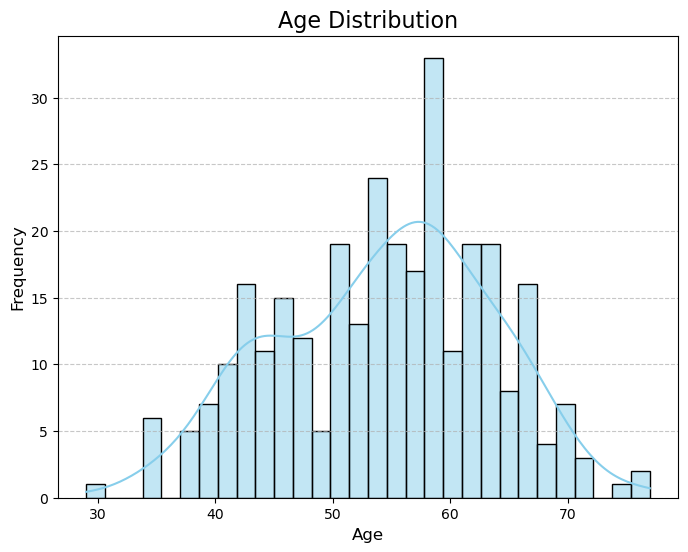

In [80]:
# Handle missing values in the 'age' column by imputing the median age
data['age'].fillna(data['age'].median(), inplace=True)

# 1. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='skyblue', bins=30)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

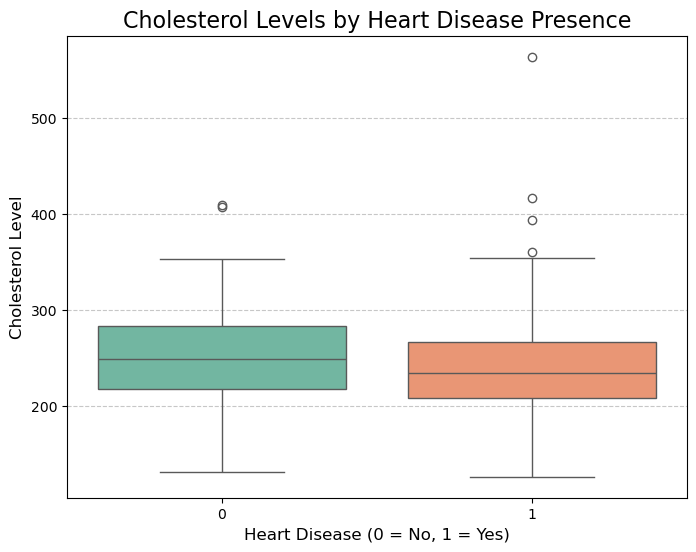

In [81]:
# 2. Cholesterol Levels by Heart Disease Presence
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='output', y='chol', palette='Set2')
plt.title('Cholesterol Levels by Heart Disease Presence', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Cholesterol Level', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

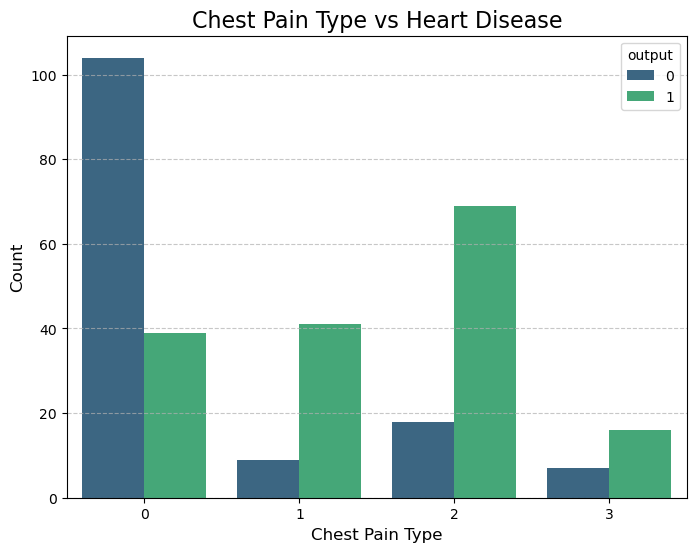

In [82]:
# 3. Chest Pain Type vs Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='cp', hue='output', palette='viridis')
plt.title('Chest Pain Type vs Heart Disease', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

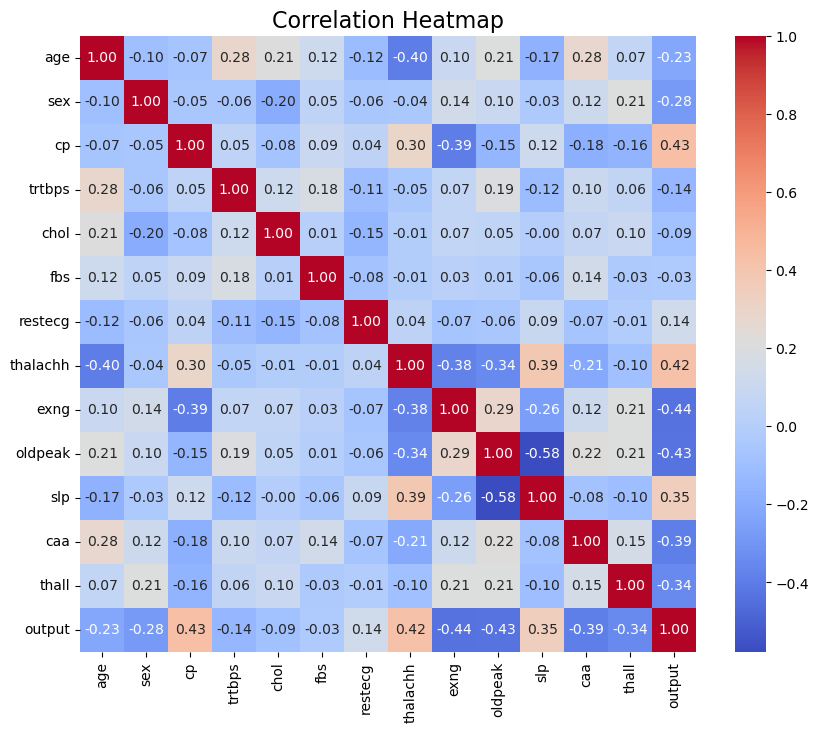

In [83]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


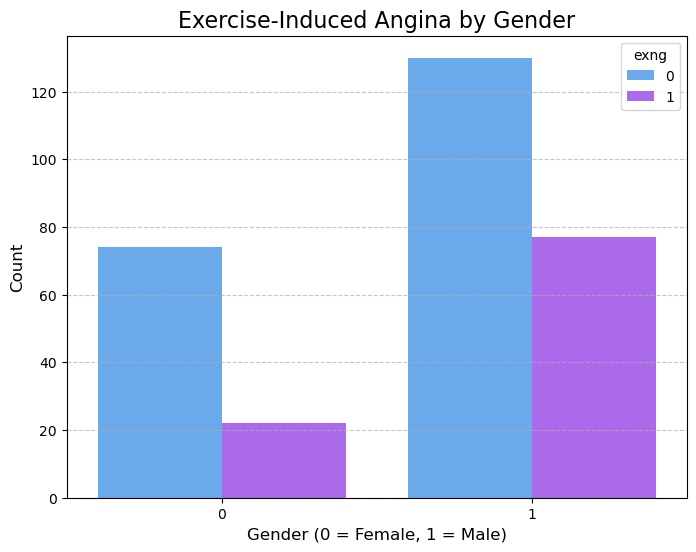

In [84]:
# 5. Exercise-Induced Angina by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sex', hue='exng', palette='cool')
plt.title('Exercise-Induced Angina by Gender', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Applying feature scaling 

In [86]:
rbs = RobustScaler()
new_num_var = ["age", "thalach", "trtbps", "oldpeak"]
df_copy[new_num_var] = rbs.fit_transform(df_copy[new_num_var])
df_copy.head()

,age,trtbps,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.592593,0.75,-0.092308,0.9375,1,True,False,False,True,False,False,False,False,False,False,False,True,False,False
1,-1.333333,0.00,1.046154,1.6875,1,True,False,True,False,False,False,False,False,False,False,False,False,True,False
2,-1.037037,0.00,0.584615,0.3750,1,False,True,False,False,False,False,True,False,False,False,False,False,True,False
3,0.074074,-0.50,0.769231,0.0000,1,True,True,False,False,False,False,True,False,False,False,False,False,True,False
4,0.148148,-0.50,0.307692,-0.1250,1,False,False,False,False,True,False,True,False,False,False,False,False,True,False


## Separating Data into Test and Training Set

In [88]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [90]:
X_train.head()

,age,trtbps,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
45,-0.222222,-0.5,0.584615,-0.375,True,True,False,False,False,False,True,False,False,False,False,False,True,False
31,0.740741,-0.5,-0.400000,-0.250,True,False,False,False,False,False,True,False,False,False,False,False,False,True
263,0.592593,-1.1,0.492308,0.625,False,False,False,False,True,True,False,False,True,False,False,False,True,False
254,0.296296,1.5,-0.861538,-0.500,True,False,False,True,False,False,True,False,False,False,False,False,True,False
153,0.814815,0.8,-0.030769,-0.500,False,False,True,False,False,True,False,True,False,False,False,False,True,False


In [91]:
y_train.head()

,target
45,1
31,1
263,0
254,0
153,1


## ML Algorithms 

In [93]:
#Linear Regression 

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr

LogisticRegression()

In [95]:
lr.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred = lr.predict(X_test)

In [97]:
y_pred


array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8032786885245902


In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
scores = cross_val_score(lr, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7690476190476191


In [101]:
from sklearn.metrics import confusion_matrix
conf= confusion_matrix (y_test, y_pred)
print("Confusion Matrix:", conf)
print("The Accuracy of LR is: ", accuracy_score(y_test, y_pred)*1)

Confusion Matrix: [[25  9]
 [ 3 24]]
The Accuracy of LR is:  0.8032786885245902


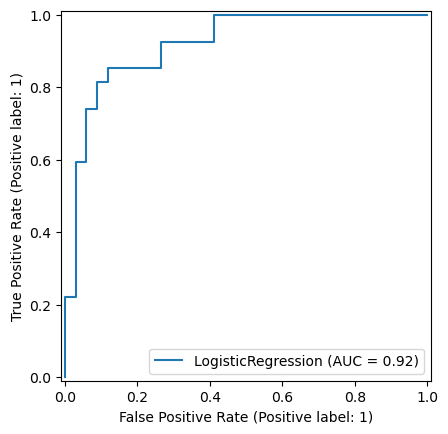

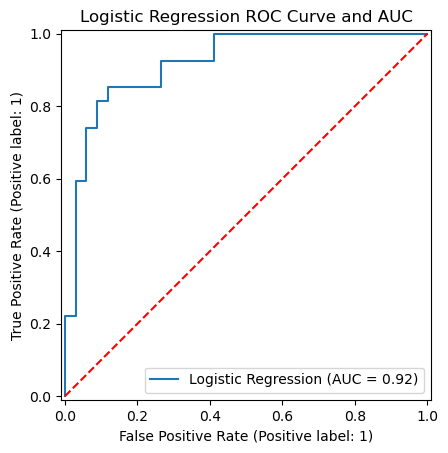

In [102]:
from sklearn.metrics import RocCurveDisplay

# Assuming you already have your trained classifier (`clf`) and test data (`X_test`, `y_test`)

# Create the RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_estimator(estimator=lr, X=X_test, y=y_test)

# Customize the plot (optional)
roc_curve_display.plot(name="Logistic Regression")  # Set the name for the curve
plt.title("Logistic Regression ROC Curve and AUC")  # Set the plot title
plt.plot([0, 1], [0, 1], "r--")  # Plot the random guess line

# Show the plot
plt.show()

In [103]:
#Decision tree algorithm

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt = DecisionTreeClassifier()

In [106]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
y_pred = dt.predict(X_test)

In [108]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.639344262295082


In [109]:
scores = cross_val_score(dt, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.6404761904761905


### With hyperparameter tuning using GridSearchCV 

In [111]:
td = {
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14, None]
}

In [112]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(dt, param_grid = td, cv = 10, n_jobs= 1)
gsc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, None]})

In [113]:
gsc.best_score_

0.773

In [114]:
gsc.best_params_

{'criterion': 'gini', 'max_depth': 1}

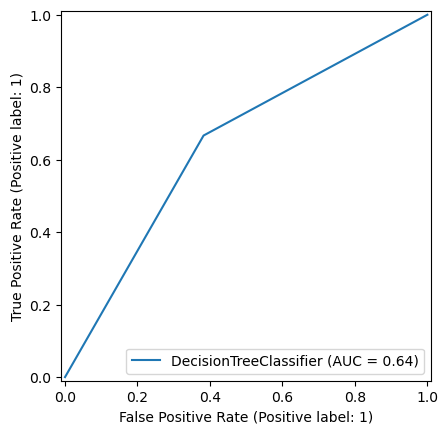

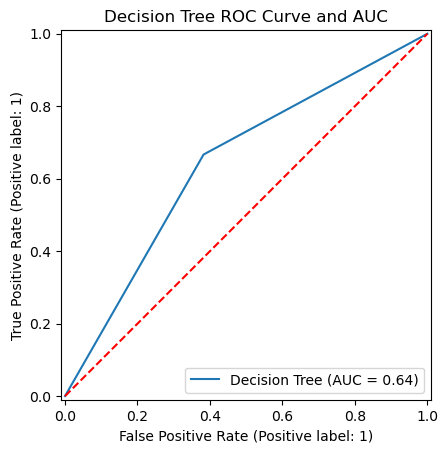

In [115]:
# Create the RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_estimator(estimator=dt, X=X_test, y=y_test)

# Customize the plot (optional)
roc_curve_display.plot(name="Decision Tree")
plt.title("Decision Tree ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")  # Plot the random guess line

# Show the plot
plt.show()